<div class="usecase-title">Use Case 2 High-rise Building and Public Transport</div>

<div class="usecase-authors"><b>Authored by: </b>JACK PHAM, BASILIA CARMEL SETHU

</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b> Python, Data Engineering and Spatial Analysis</div>
</div>

<div class="usecase-section-header">Scenario</div>

**1. As a citizen, I want to have easy access to public transportation.** 

From a citizen/resident perspective, I want to have a good accessibility to public transportation. I seek to understand which areas of the city provides easiest access to transportation infrastructure like bus, train and tram stops.


**2. As city planners, we want to make sure the supply of transportation infrastructure will meet demand.** 

From a leadership & strategic perspective as a council, we seek to invest in initiatives that effectively makes it easier to access public transportation. We want to prioritize the investments in areas with high demand and areas with difficult access to transport.

<div class="usecase-section-header">Objectives for the Exploratory Data Analysis</div>

Using the power of data aggregation, we can combine Melbourne Open transport datasets such as bus, train and tram stops with other data like dwellings and begin to observe, analyze and report on geographical patterns between these datasets. Besides, we can apply spatial analysis techinques such as distance analysis, to evaluate the accessibilty to public transportation.

We can ask question such as: 

1. What are the areas where it's more difficult to have access to public transport?
2. What are the areas with more demand for public transport, considering actual and future conditions?
3. In the areas where the demand for transport is higher, is this demand being met?

Goals for the exploratory data analysis:

1. Analyse the distance and time from properties locations to transport infrastructure (bus, train and tram stops)
2. Analyse the number of dwellings on each area, considering both today's scenario and future forecasts.
3. Analyse the relationship between the number of dwellings in an area and the access to transport infrastructure


This use case will involve some exploratory data analysis and aggregation of open data datasets.
A source of inspiration for this use case comes from, the Centre for Urban Research at RMIT University. They published a critical policy brief in 2020 which articulated the Transport Impacts of New High Density Housing
“Approvals for high-density housing in Australia have risen steeply, with the number of new apartments constructed each year tripling since 2009.1 In the last five years, apartments accounted for around 40% of all residential building approvals in Melbourne. 2 This has significant implications for transport and urban planning, including effects on road congestion, car parking, and overcrowding on public transport.”

<div class="usecase-section-header">Strategic benefits for City of Melbourne</div>

This use case and exploratory data analysis project can support the City of Melbourne in the following ways:

1. Support for the Melbourne ‘Transport Strategy 2030’ strategic vision and goals

2. Influence the creation of a ‘Transport access indicator’ to monitor progress on transport accessibilty on Melbourne districts

3. Support further discussion between City of Melbourne and Victorian transport partner agencies to improve transport accessibility programs

<div class="usecase-section-header">Exploratory Data Analysis Worflow Steps</div>

1. Access and read-in Melbourne data as Geopandas GeoDataFrames.

  
2. Create simple map visualizations for those data to contextualize their extent.

3. Calculate the number of dwellings on each region. We consider 3 approaches to define the regions.
    * Grid of square cells

    * CLUE blocks

    * CLUE small areas

4. Explore how will the dwellings total change on each district over the next 20 years using dwellings forecast data.

5. Explore the accessibility from dwellings to bus, train and tram stops. That includes calculating:
    * Distance from dwellings to stops

    * Walking time from dwellings to stops
    
    * Number of stops in a 300 meter radius of the dwellings

6. Aggregate the calculated accessibility informations by Grid cell and by CLUE small areas. Then explore the correlation between number of dwellings and the access to transport infrastructure


**Dataset list:**
1. Melbourne Open Data bus stops 
2. Melbourne Open Data train stops
3. Melbourne Open Data tram stops
4. Melbourne Open Data high rise dwellings 
4. Melbourne Open Data dwellings forecast 
5. Melbourne Open Data CLUE small areas 
6. Melbourne Open Data CLUE blocks 




To begin the analysis we first import the necessary libraries to support our exploratory data analysis using Melbourne Open data.

The following are core packages required for this exercise:

- plotly // An interactive, open-source, and browser-based graphing library. It offers Python-based charting, powered by plotly.js.

- geopandas // An open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. 

In [1]:
###################################################################
# Libraries used for this use case and exploratory data analysis
###################################################################

import plotly.express as px
import folium
import pandas as pd
import time
from datetime import datetime
import numpy as np
import pyproj
import requests
import plotly.express as px
import plotly.graph_objs as go  
import geopandas as gpd
import shapely.geometry
import folium
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
from shapely.geometry import box
from shapely.geometry import shape

warnings.filterwarnings("ignore")

**Showing the map of Melbourne**

Before starting the analysis, let's take a look at the surrounidngs of the city of Melbourne, which is our region of interest in this analysis

In [2]:
m = folium.Map([-37.8,145],zoom_start=12)
m

## Data Extraction and Visualization

In this section, we will open the datasets necessary to perform our analysis, and also plot some of this datasets in order to get a glimpse at their content and spatial extent.

### Dwellings

Let's open and visualize Dwellings data. This dataset contains the location and information about properties and dewllings

#### Opening data

In [11]:
import requests
import pandas as pd
from io import StringIO

#Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key #use if use datasets API_key permissions
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey  #use if use datasets API_key permissions
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')



In [17]:
# Set dataset_id to query for the API call dataset name
dataset_1_id= 'residential-dwellings'

In [21]:
# Save dataset to df1.df2.df3 and df4 varaible
dwellings_gdf = collect_data(dataset_1_id)

In [23]:
dwellings_gdf.head(3)

census_year  block_id  property_id  base_property_id  \
0         2007       222       103736            103736   
1         2007       222       103738            103738   
2         2007       222       103740            103740   

                    building_address clue_small_area    dwelling_type  \
0  88-90 Faraday Street CARLTON 3053         Carlton  House/Townhouse   
1     82 Faraday Street CARLTON 3053         Carlton  House/Townhouse   
2     78 Faraday Street CARLTON 3053         Carlton  House/Townhouse   

   dwelling_number   longitude   latitude  \
0                1  144.971540 -37.798908   
1                1  144.971687 -37.798926   
2                1  144.971796 -37.798937   

                                  location  
0  -37.798907837263265, 144.97154018206476  
1    -37.7989256509605, 144.97168673153124  
2   -37.79893745544278, 144.97179564162215

In [25]:
# Rename columns to match the desired format
dwellings_gdf = dwellings_gdf.rename(columns={
    'census_year': 'Census year',
    'block_id': 'Block ID',
    'property_id': 'Property ID',
    'base_property_id': 'Base property ID',
    'building_address': 'Building address',
    'clue_small_area': 'CLUE small area',
    'dwelling_type': 'Dwelling type',
    'dwelling_number': 'Dwelling number',
    'longitude': 'x coordinate',
    'latitude': 'y coordinate'
})

# Display the first few rows to check the renamed columns
dwellings_gdf.head(3)



Census year  Block ID  Property ID  Base property ID  \
0         2007       222       103736            103736   
1         2007       222       103738            103738   
2         2007       222       103740            103740   

                    Building address CLUE small area    Dwelling type  \
0  88-90 Faraday Street CARLTON 3053         Carlton  House/Townhouse   
1     82 Faraday Street CARLTON 3053         Carlton  House/Townhouse   
2     78 Faraday Street CARLTON 3053         Carlton  House/Townhouse   

   Dwelling number  x coordinate  y coordinate  \
0                1    144.971540    -37.798908   
1                1    144.971687    -37.798926   
2                1    144.971796    -37.798937   

                                  location  
0  -37.798907837263265, 144.97154018206476  
1    -37.7989256509605, 144.97168673153124  
2   -37.79893745544278, 144.97179564162215

In [27]:
import requests
import pandas as pd
import geopandas as gpd
from io import StringIO
import pyproj

# Function to collect data with error handling
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        url_content = response.content.decode('utf-8')
        try:
            # Use on_bad_lines to skip bad lines
            dataset = pd.read_csv(StringIO(url_content), delimiter=',', on_bad_lines='skip')
            return dataset
        except pd.errors.ParserError as e:
            print(f'ParserError: {e}')
            return None
    else:
        print(f'Request failed with status code {response.status_code}')
        return None

# Set the dataset_id
dataset_1_id = 'residential-dwellings'

# Collect the dataset
dwellings_df = collect_data(dataset_1_id)

# If data is successfully collected, proceed with processing
if dwellings_df is not None:
    # Corrected grouping fields and aggregation fields based on the actual column names
    groupbyfields = ['clue_small_area', 'block_id']
    aggregatebyfields = {
        'dwelling_number': ["sum"],
        'latitude': ["first"],
        'longitude': ["first"]
    }

    # Grouping and aggregating with correct column names
    dwellings_grouped = dwellings_df.groupby(groupbyfields).agg(aggregatebyfields).reset_index()

    # Ensure that longitude and latitude are numeric and have no missing values
    dwellings_grouped['longitude'] = pd.to_numeric(dwellings_grouped['longitude'], errors='coerce')
    dwellings_grouped['latitude'] = pd.to_numeric(dwellings_grouped['latitude'], errors='coerce')

    # Drop rows with missing longitude or latitude
    dwellings_grouped = dwellings_grouped.dropna(subset=['longitude', 'latitude'])

    # Converting to GeoDataFrame with corrected coordinate columns
    dwellings_gdf = gpd.GeoDataFrame(
        dwellings_grouped, 
        geometry=gpd.points_from_xy(dwellings_grouped['longitude'], dwellings_grouped['latitude'])
    )

    # Set CRS (Coordinate Reference System)
    dwellings_gdf = dwellings_gdf.set_crs(pyproj.CRS.from_user_input('EPSG:4326'))
    dwellings_gdf = dwellings_gdf.to_crs(pyproj.CRS.from_user_input('EPSG:28355'))

    # Rename columns to match the desired format
    dwellings_gdf = dwellings_gdf.rename(columns={
        'census_year': 'Census year',
        'block_id': 'Block ID',
        'property_id': 'Property ID',
        'base_property_id': 'Base property ID',
        'building_address': 'Building address',
        'clue_small_area': 'CLUE small area',
        'dwelling_type': 'Dwelling type',
        'dwelling_number': 'Dwelling number',
        'longitude': 'x coordinate',
        'latitude': 'y coordinate'
    })

    # Reorder columns to match the desired output
    columns_order = [
        'Census year', 'Block ID', 'Property ID', 'Base property ID',
        'Building address', 'CLUE small area', 'Dwelling type',
        'Dwelling number', 'x coordinate', 'y coordinate', 'geometry'
    ]

    dwellings_gdf = dwellings_gdf[columns_order]

    # Display the DataFrame to verify the changes
    print(dwellings_gdf.head(3))
else:
    print("Data collection failed.")


KeyError: 'clue_small_area'

In [7]:
# Check the data types and summary of the longitude and latitude columns
print(dwellings_grouped['longitude'].dtype)
print(dwellings_grouped['latitude'].dtype)
print(dwellings_grouped[['longitude', 'latitude']].describe())

# Check for missing values
print(dwellings_grouped[['longitude', 'latitude']].isnull().sum())


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [3]:

groupbyfields = ['CLUE small area','Block ID']
aggregatebyfields = {'Dwelling number': ["sum"],
                    'y coordinate':["first"],
                     'x coordinate':["first"]}

#dwellings_gdf = gpd.read_file('https://data.melbourne.vic.gov.au/explore/dataset/residential-dwellings/download/?format=geojson&timezone=America/Argentina/Buenos_Aires&lang=en')
dwellings_gdf = pd.read_csv('Residential_dwellings_2020.csv')
dwellings_gdf = gpd.GeoDataFrame(dwellings_gdf, geometry = gpd.points_from_xy(dwellings_gdf['x coordinate'], dwellings_gdf['y coordinate'])) 
#dwellings_gdf = dwellings_gdf[dwellings_gdf['census_year'] == '2020']
dwellings_gdf = dwellings_gdf.set_crs(pyproj.CRS.from_user_input('EPSG:4326'))
dwellings_gdf = dwellings_gdf.to_crs( pyproj.CRS.from_user_input('EPSG:28355'))
dwellings_gdf.head(3)

Census year  Block ID  Property ID  Base property ID  \
0         2020         1       611394            611394   
1         2020         1       611395            611395   
2         2020        11       103957            103957   

                             Building address  CLUE small area  \
0  545-557 Flinders Street MELBOURNE VIC 3000  Melbourne (CBD)   
1  561-581 Flinders Street MELBOURNE VIC 3000  Melbourne (CBD)   
2    517-537 Flinders Lane MELBOURNE VIC 3000  Melbourne (CBD)   

            Dwelling type  Dwelling number  x coordinate  y coordinate  \
0  Residential Apartments              196     144.95651     -37.82098   
1  Residential Apartments              189     144.95591     -37.82109   
2  Residential Apartments               26     144.95666     -37.81987   

                         geometry  
0  POINT (320142.225 5812080.098)  
1  POINT (320089.677 5812066.736)  
2  POINT (320152.734 5812203.559)

#### Plotting map

Plotting data on high rise dwellings in Melbourne city, where the size of bubble denotes the number of residents. To achive that, we group buildings by block ID and CLUE small area and aggregate on Dwelling number totals.

In [26]:

dwellingsByLocn = pd.DataFrame(dwellings_gdf.groupby(groupbyfields, as_index=False).agg(aggregatebyfields))
dwellingsByLocn.columns = dwellingsByLocn.columns.get_level_values(0)
dwellingsByLocn

fig = px.scatter_mapbox(dwellingsByLocn, lat="y coordinate", lon="x coordinate",
                        hover_name="CLUE small area",
                        hover_data=["CLUE small area", "Dwelling number"],
                        color_continuous_scale=px.colors.sequential.Plasma, zoom=12, height=600,
                        color="Dwelling number",
                        size = "Dwelling number"
                       )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

KeyError: 'clue_small_area'

### Dwellings forecast

Let's open dwellings forecast data. This dataset have information about the expected number of dwllings by distric in every year, ranging from 2020 to 2040.

#### opening data

In [5]:
#Dwelling forecast
dwellings_forecast_df = pd.read_csv('https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-dwellings-and-household-forecasts-by-small-area-2020-2040/download/?format=csv&timezone=America/Argentina/Buenos_Aires&lang=en&use_labels_for_header=true&csv_separator=%2C')
dwellings_forecast_df['Value'] = dwellings_forecast_df['Value'].astype('int')
dwellings_forecast_df['Year'] = dwellings_forecast_df['Year'].astype('int')
dwellings_forecast_df = dwellings_forecast_df[dwellings_forecast_df['Geography']!='City of Melbourne']
dwellings_forecast_df = dwellings_forecast_df.groupby(['Geography','Year']).agg('sum')['Value'].reset_index()
dwellings_forecast_df.head(3)

Geography  Year  Value
0   Carlton  2021  35519
1   Carlton  2022  35821
2   Carlton  2023  36854

### CLUE Blocks and Small Areas

Let's open and visualize CLUE blocks and Small areas data. 

There are 13 standard predefined CLUE small areas within the City of Melbourne. These small areas are named after official place names and suburbs but are different from these places and suburbs.

The CLUE blocks refer to the census aream and is divided into 606 city blocks, each of which is identified by a unique block number. These blocks are primarily bounded by main roads and also take into account similar space use.

#### Opening data

In [6]:
#Creating clue_blocks geodataframe
clue_blocks_gdf = gpd.read_file('https://data.melbourne.vic.gov.au/explore/dataset/blocks-for-census-of-land-use-and-employment-clue/download/?format=geojson&timezone=America/Argentina/Buenos_Aires&lang=en')
clue_blocks_gdf = clue_blocks_gdf.set_crs(pyproj.CRS.from_user_input('EPSG:4326'))
clue_blocks_gdf = clue_blocks_gdf.to_crs( pyproj.CRS.from_user_input('EPSG:28355'))

#Creating clue small areas geodataframe
clue_small_areas_gdf = gpd.read_file('https://data.melbourne.vic.gov.au/explore/dataset/small-areas-for-census-of-land-use-and-employment-clue/download/?format=geojson&timezone=America/Argentina/Buenos_Aires&lang=en')
clue_small_areas_gdf = clue_small_areas_gdf.set_crs(pyproj.CRS.from_user_input('EPSG:4326'))
clue_small_areas_gdf = clue_small_areas_gdf.to_crs( pyproj.CRS.from_user_input('EPSG:28355'))
clue_small_areas_gdf.head(3)

featurenam     shape_area      shape_len  \
0    Parkville   4050997.2362  9224.56939673   
1    Southbank  1596010.33174  6012.37723915   
2  South Yarra  1057773.39715  5424.13644582   

                                            geometry  
0  MULTIPOLYGON (((318639.485 5815751.194, 318612...  
1  MULTIPOLYGON (((320102.212 5811843.555, 320282...  
2  MULTIPOLYGON (((322711.120 5809393.959, 322619...

### Bus stops

Let's open and visualize bus stops data. This dataset has the location of bus stops in the city of Melbourne

#### Opening data

In [7]:
bus_stops_gdf = gpd.read_file('https://data.melbourne.vic.gov.au/explore/dataset/bus-stops/download/?format=geojson&timezone=America/Argentina/Buenos_Aires&lang=en')
bus_stops_gdf['Longitude'] = bus_stops_gdf.geometry.x
bus_stops_gdf['Latitude'] = bus_stops_gdf.geometry.y
bus_stops_gdf = bus_stops_gdf.set_crs(pyproj.CRS.from_user_input('EPSG:4326'))
#Reprojecting to planar coordinates
bus_stops_gdf = bus_stops_gdf.to_crs( pyproj.CRS.from_user_input('EPSG:28355'))
bus_stops_gdf.head(3)

objectid  prop_id                       model_desc addresspt   mcc_id  \
0       355        0  Sign - Public Transport 1 Panel    570648  1235255   
1       600        0  Sign - Public Transport 1 Panel    548056  1231226   
2       640        0  Sign - Public Transport 1 Panel    543382  1237092   

   roadseg_id asset_clas model_no  addressp_1               asset_type  \
0       21673    Signage     P.16         357  Sign - Public Transport   
1       20184    Signage     P.16          83  Sign - Public Transport   
2       20186    Signage     P.16         207  Sign - Public Transport   

    str_id                                        descriptio  addresspt1  \
0  1235255  Sign - Public Transport 1 Panel Bus Stop Type 13   76.819824   
1  1231226   Sign - Public Transport 1 Panel Bus Stop Type 8   21.561304   
2  1237092   Sign - Public Transport 1 Panel Bus Stop Type 8   42.177187   

                         geometry   Longitude   Latitude  
0  POINT (317977.230 5813935.160)  144.932393 -37.803842  
1  POINT (320275.850 5812692.850)  144.958179 -37.815487  
2  POINT (320192.240 5812907.290)  144.957283 -37.813539

#### Plotting map

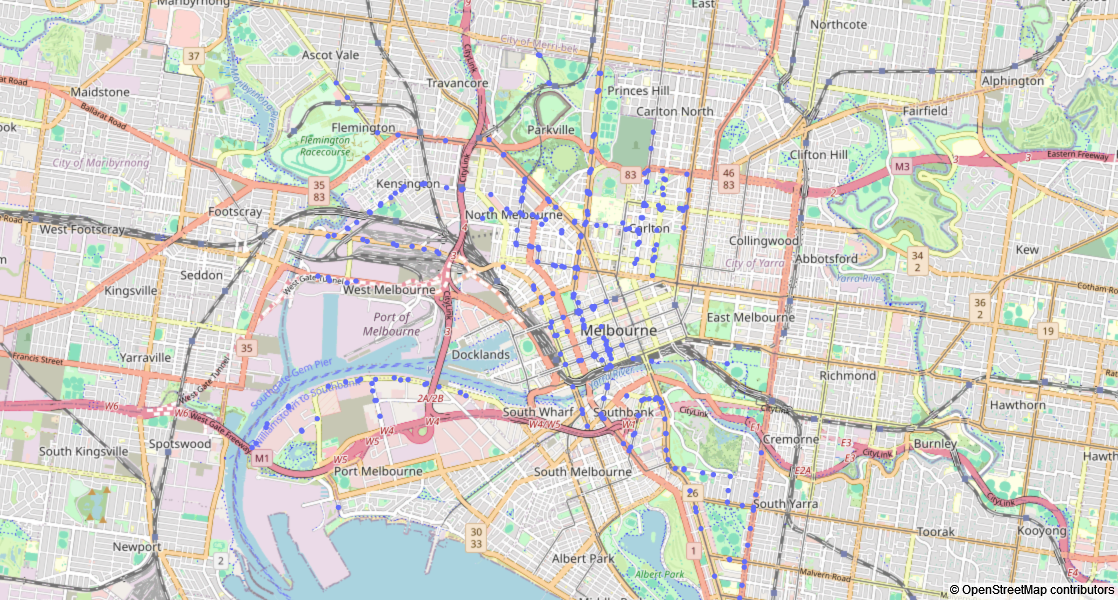

In [8]:
fig = px.scatter_mapbox(bus_stops_gdf, lat="Latitude", lon="Longitude",
                        hover_name="objectid",
                        color_continuous_scale=px.colors.sequential.Plasma, zoom=12, height=600,
                       )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})



fig.show()


### Train stops

Let's open and visualize train stops data. This dataset has the information on the location of train stops in the city of Melbourne

#### Opening data

In [9]:
train_stops_gdf = gpd.read_file('https://data.melbourne.vic.gov.au/explore/dataset/metro-train-stations-with-accessibility-information/download/?format=geojson&timezone=America/Argentina/Buenos_Aires&lang=en')
train_stops_gdf['LONGITUDE'] = train_stops_gdf.geometry.x
train_stops_gdf['LATITUDE'] = train_stops_gdf.geometry.y
train_stops_gdf = train_stops_gdf.to_crs(pyproj.CRS.from_user_input('EPSG:28355'))
train_stops_gdf

he_loop        pids     station lift                        geometry  \
0        No  Dot Matrix    Armadale   No  POINT (325759.223 5808265.019)   
1        No          No   Aspendale   No  POINT (333415.085 5789484.185)   
2        No  Dot Matrix    Belgrave   No  POINT (355415.969 5802995.343)   
3        No          No     Bittern   No  POINT (340740.650 5755138.923)   
4        No  Dot Matrix   Blackburn  Yes  POINT (337189.340 5812526.638)   
..      ...         ...         ...  ...                             ...   
214      No  Dot Matrix     Windsor   No  POINT (323325.879 5808280.293)   
215      No          No    Yarraman   No  POINT (341187.095 5795067.192)   
216      No         LCD  Yarraville   No  POINT (314272.541 5812523.237)   
217     Yes  Dot Matrix    Coolaroo  Yes  POINT (317067.770 5829773.165)   
218     Yes  Dot Matrix    Lynbrook   No  POINT (346415.148 5786377.210)   

      LONGITUDE   LATITUDE  
0    145.019374 -37.856435  
1    145.102007 -38.027045  
2    145.355291 -37.909099  
3    145.177739 -38.337747  
4    145.150197 -37.820158  
..          ...        ...  
214  144.991733 -37.855829  
215  145.191752 -37.978147  
216  144.889975 -37.815813  
217  144.926053 -37.661001  
218  145.249391 -38.057332  

[219 rows x 7 columns]

#### plotting map

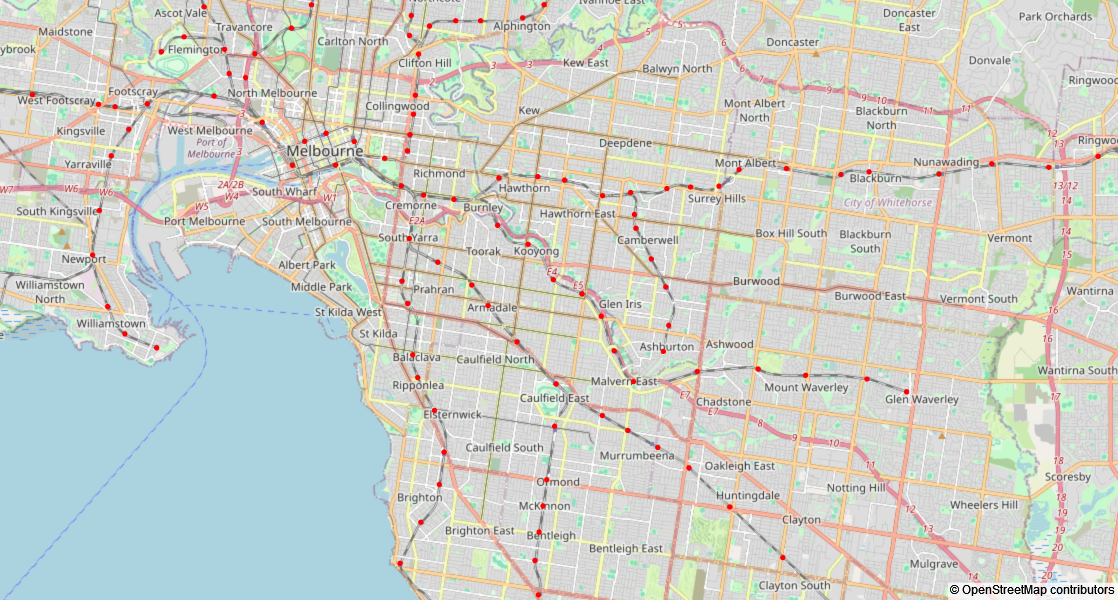

In [10]:
fig = px.scatter_mapbox(train_stops_gdf, lat="LATITUDE", lon="LONGITUDE",
                        hover_name="station",
                        zoom=11, height=600,
                        color_discrete_sequence = ['#FF0000'])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


### Tram stops

Let's open and visualize tram stops data. This dataset has the location of tram stops in the city of Melbourne

#### Opening data

In [11]:
tram_stops_gdf = gpd.read_file('metro tram stop/PTV_METRO_TRAM_STOP.shp')
tram_stops_gdf

STOP_ID                                   STOP_NAME   LATITUDE  \
0      18730     134-Merribell Ave/Nicholson St (Coburg) -37.744359   
1      18732     44-Deepdene Park/Whitehorse Rd (Balwyn) -37.811375   
2      18733      45-Hardwicke St/Whitehorse Rd (Balwyn) -37.811750   
3      18734     46-Balwyn Cinema/Whitehorse Rd (Balwyn) -37.812242   
4      18735         47-Balwyn Rd/Whitehorse Rd (Balwyn) -37.812919   
...      ...                                         ...        ...   
1660    6037              34-Bent St/High St (Northcote) -37.767614   
1661    6038         33-Arthurton Rd/High St (Northcote) -37.769413   
1662    6039          32-Mitchell St/High St (Northcote) -37.771138   
1663    6040  31-Northcote Town Hall/High St (Northcote) -37.774712   
1664    6041            30-Clarke St/High St (Northcote) -37.776690   

       LONGITUDE TICKETZONE ROUTEUSSP                        geometry  
0     144.977728          1         1  POINT (321825.986 5820623.023)  
1     145.068671          1       109  POINT (329993.016 5813355.988)  
2     145.071785          1       109  POINT (330268.014 5813320.036)  
3     145.075930          1       109  POINT (330634.010 5813272.971)  
4     145.081524        1,2       109  POINT (331128.013 5813207.978)  
...          ...        ...       ...                             ...  
1660  144.999096          1        86  POINT (323764.041 5818083.024)  
1661  144.998900          1        86  POINT (323751.030 5817883.037)  
1662  144.998569          1        86  POINT (323725.986 5817690.996)  
1663  144.997837          1        86  POINT (323669.980 5817293.028)  
1664  144.997534          1        86  POINT (323648.014 5817072.966)  

[1665 rows x 7 columns]

#### Plotting map

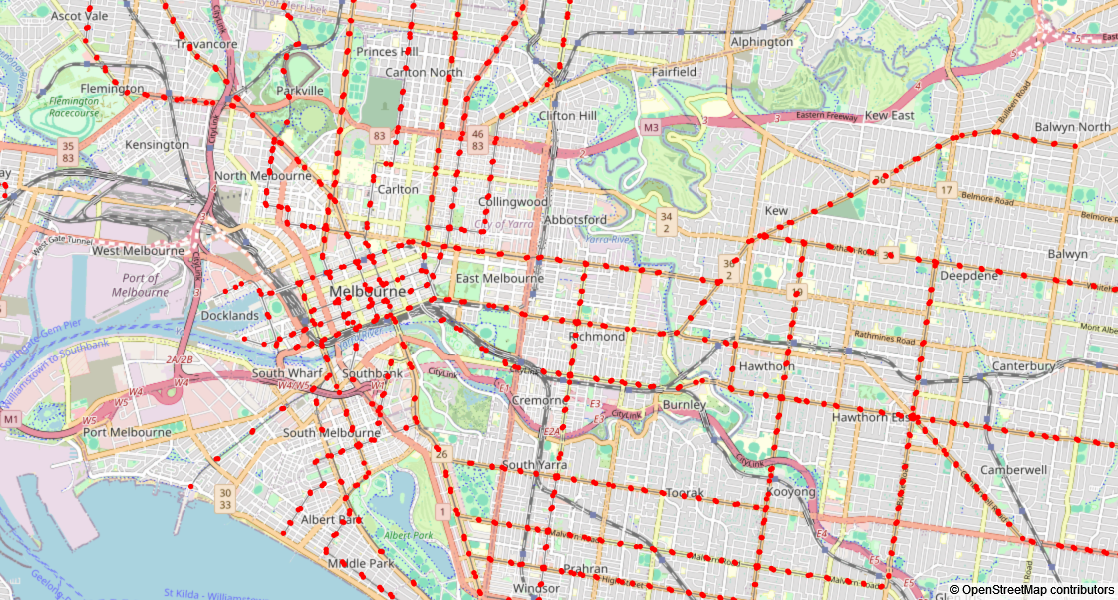

In [12]:
tram_df = tram_stops_gdf[['STOP_NAME','LATITUDE','LONGITUDE']]
fig = px.scatter_mapbox(tram_df, lat="LATITUDE", lon="LONGITUDE",
                        hover_name="STOP_NAME",
                        color_continuous_scale="rdgy", zoom=12, height=600,
                        color_discrete_sequence = ['#FF0000'],
                        
                       )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()


## Analysis of the number of dwellings

In this section we will visualize and analyse the dwelllings distribution over the city of Melbourne

To explore this data, we will aggregate them by 3 different limits:

* A squared grid
    * Because it provides consistent statistical/correlation analysis
* CLUE small areas
    * Since it's used by the city government for planning and data aggregation
* CLUE blocks
    * Since it's used by the city government for planning and data aggregation

Here we define the functions that allow us to aggregate the data by this 3 limits. 

The 'create grid' function creates a grid GeoDataFrame using the desired number of cells

The 'summarize_within' function aggregates spatial data using spatial operations

In [13]:
def create_grid(gdf, n_cells=15):

    '''
    Creates a regular grid over the extent of gdf

    Returns:
        A GeoDataFrame with the cells geometries
    '''
    # total area for the grid
    xmin, ymin, xmax, ymax= gdf.total_bounds
    # how many cells across and down
    cell_size = (xmax-xmin)/n_cells
    # projection of the grid
    #crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
    crs = gdf.crs
    # create the cells in a loop
    grid_cells = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            # bounds
            x1 = x0-cell_size
            y1 = y0+cell_size
            grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
    grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                    crs=crs)
    return grid



def summarize_within(input_gdf, input_summary_gdf, in_fields, out_fields = None, aggfunc='mean'):
    '''
    Overlays a polygon layer with another layer to calculate attribute field statistics about those features (input_summary_gdf) within the polygons (input_gdf).

    Parameters:
        input_gdf: Geodataframe of the polygons in which features will be summarized by.
        input_summary_gdf: Geodataframe of features that will be summarized
        in_fields: name of the fields (in input_summary_gdf) that will be summarized
        out_fields: name that the fields will have after they're summarized
        aggfunc: function that will be used to summarize
    
    Returns:
        A geodataframe with 'input_gdf' polygons and the attributes of 'input_summary_gdf' summarized by each polygon.

    '''
    input_gdf = input_gdf.copy()
    input_summary_gdf = input_summary_gdf.copy()
    if out_fields == None:
        out_fields = in_fields
    #Merges the dwelling points with the input_polygons. A new column "index right" is created. It indicates in what cell the property is within.
    merged = gpd.sjoin(input_summary_gdf, input_gdf, how='left')
    #Now lets count how many properties are within each cell
    dissolve = merged.dissolve(by="index_right", aggfunc=aggfunc) #Dissolve (looks like groupby) by the cell index
    for in_field, out_field in zip(in_fields, out_fields):
        input_gdf.loc[dissolve.index, out_field] = dissolve[in_field].values #Putting number of properties in input_polygons gdf

    return input_gdf.round(2)


### By grid cell

Below, we create a squared grid using the functions described previously. Then we calculate the total number of dwellings on each cell of the grid, and plot this on the map.

In [14]:

#Creating the grid GeoDataFrame
grids = create_grid(dwellings_gdf)
dwellings_gdf['n_properties']=1 #initialize n_properties to 1, so we can sum how many properties in each grid cell
#Summarizing Dwelling GeodataFrame by sum
summarized_grid = summarize_within(
    grids, 
    dwellings_gdf,
     in_fields= ['n_properties', 'Dwelling number'], 
     out_fields= ['Properties', 'Dwelling number'],
     aggfunc='sum')
#Summarizing Dwelling GeodataFrame by mean

summarized_grid = summarized_grid.to_crs(pyproj.CRS.from_epsg(4326))
x,y = box(*summarized_grid.total_bounds).centroid.xy
fig = px.choropleth_mapbox(summarized_grid, geojson=summarized_grid.geometry, locations=summarized_grid.index, color="Dwelling number", center={"lat": y[0], "lon": x[0]},
                           mapbox_style="open-street-map", zoom=11, opacity=0.7, color_continuous_scale=px.colors.sequential.YlOrRd)
fig.show()



### By CLUE blocks

Below we calculate the total number of dwellings on each clue block, and plot this on the map.

In [15]:
dwellings_gdf['n_properties']=1 #initialize n_properties to 1, so we can sum how many properties in each grid cell
#Summarizing Dwelling GeodataFrame by sum
summarized_clue_blocks = summarize_within(
    clue_blocks_gdf, 
    dwellings_gdf,
     in_fields= ['n_properties', 'Dwelling number'], 
     out_fields= ['Properties', 'Dwelling number'],
     aggfunc='sum')

summarized_clue_blocks = summarized_clue_blocks.set_index('block_id')
summarized_clue_blocks = summarized_clue_blocks.to_crs(pyproj.CRS.from_epsg(4326))
x,y = box(*summarized_clue_blocks.total_bounds).centroid.xy
fig = px.choropleth_mapbox(summarized_clue_blocks, geojson=summarized_clue_blocks.geometry, locations=summarized_clue_blocks.index, color="Dwelling number", center={"lat": y[0], "lon": x[0]},
                           mapbox_style="open-street-map", zoom=11, opacity=0.7, color_continuous_scale=px.colors.sequential.YlOrRd)
fig.show()

### By CLUE small areas

Below we calculate the total number of dwellings on each CLUE Small Area, and plot this on the map.

In [16]:
dwellings_gdf['n_properties']=1 #initialize n_properties to 1, so we can sum how many properties in each grid cell
#Summarizing Dwelling GeodataFrame by sum
summarized_clue_small_areas = summarize_within(
    clue_small_areas_gdf, 
    dwellings_gdf,
     in_fields= ['n_properties', 'Dwelling number'], 
     out_fields= ['Properties', 'Dwelling number'],
     aggfunc='sum')


summarized_clue_small_areas = summarized_clue_small_areas.set_index('featurenam')
summarized_clue_small_areas = summarized_clue_small_areas.to_crs(pyproj.CRS.from_epsg(4326))
x,y = box(*summarized_clue_small_areas.total_bounds).centroid.xy
fig = px.choropleth_mapbox(summarized_clue_small_areas, geojson=summarized_clue_small_areas.geometry, locations=summarized_clue_small_areas.index, color="Dwelling number", center={"lat": y[0], "lon": x[0]},
                           mapbox_style="open-street-map", zoom=11, opacity=0.7, color_continuous_scale=px.colors.sequential.YlOrRd)
fig.show()

### Dwellings forecast

Let's perform some analysis on the dwelling forecast between 2020 and 2040. This is important because we need to know not only which areas are impacted by the lack of public transport **today**, but also which areas might be affected in the **future** if the current transport scenario stays the same

In the cell below, we create 2 DataFrames from the original Dwellings forecast DataFrame. One of the created dataframes contains the records of Dwellings forecast for 2020 and the other one contains Dwellings forecast for 2040

In [17]:
dwellings_forecast_df_start = pd.DataFrame([{'small_area':group, 'value':group_df.iloc[0]['Value']} for group,group_df in dwellings_forecast_df.groupby('Geography')])
dwellings_forecast_df_end = pd.DataFrame([{'small_area':group, 'value':group_df.iloc[-1]['Value']} for group,group_df in dwellings_forecast_df.groupby('Geography')])

Below we create an interactive bar chart to visualize how the number of dwellings can potentially change between 2020 and 2040. You can click on the drop-down to choose between 'All', '2020' or '2040' Dwellings forecast.

In [18]:
fig = go.Figure()
fig.add_trace(
    go.Bar(x = dwellings_forecast_df_start['small_area'], y=dwellings_forecast_df_start['value'], name='2020',  marker = {'color':'#c49279'})
)

fig.add_trace(
    go.Bar(x = dwellings_forecast_df_end['small_area'], y=dwellings_forecast_df_end['value'], name='2040', marker = {'color':'#6f7ca8'})
)


fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True,True]},
                          {'title': 'Number of dwellings from 2020 to 2040',
                           'showlegend':True}]),
            dict(label = '2020',
                  method = 'update',
                  args = [{'visible': [True, False,False]},
                          {'title': 'Number of dwellings in 2020',
                           'showlegend':True}]),

             dict(label = '2040',
                  method = 'update',
                  args = [{'visible': [False, True, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Dwellings forecast for 2040',
                           'showlegend':True}]),
             
             
            ])
        )
    ])

fig.update_layout(title_text = 'Number of dwellings from 2020 to 2040', title_x=0.5)
fig.show()

Let's calculate the rate of change in the number of dwellings between 2020 and 2040. That rate is given by:

$rate = (\frac{dwellings_{2040}-dwellings_{2020}}{dwellings_{2020}})*100$


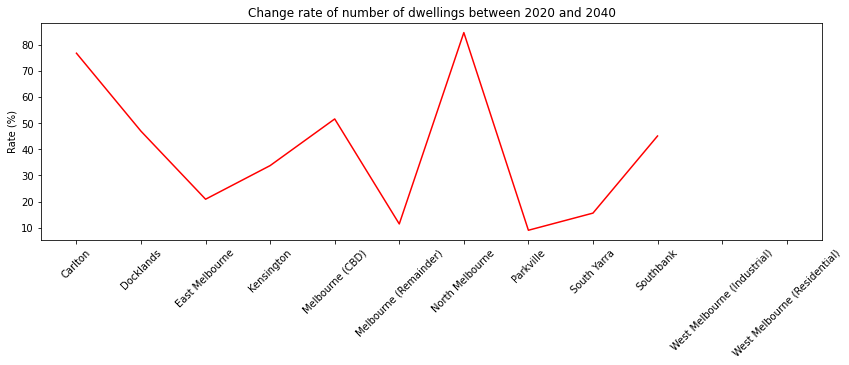

In [19]:
dwelling_growth_df = []
for group, group_df in dwellings_forecast_df.groupby('Geography'):
    today_dwellings = group_df.iloc[0]['Value']
    future_dwellings = group_df.iloc[-1]['Value']
    rate = ((future_dwellings - today_dwellings)/today_dwellings)*100
    if group!='Port Melbourne':
        dwelling_growth_df.append({'small_area':group, 'dwelling_growth_rate':rate})
dwelling_growth_df = pd.DataFrame(dwelling_growth_df)
fig, ax = plt.subplots(figsize=(14,4))
ax.hlines(0,0,len(dwelling_growth_df), linestyles='--', colors='black')

ax.plot(dwelling_growth_df['small_area'], dwelling_growth_df['dwelling_growth_rate'], c='r')
plt.xticks(rotation = 45) 
ax.set_title('Change rate of number of dwellings between 2020 and 2040')
ax.set_ylabel('Rate (%)')
plt.show()

## Public transportation

In this section we are interested in exploring each region's accessibility to transportation 

To achieve this, below we define some functions that will help us calculate 2 important information:

1. The euclidian (straight line) distance between each property and the closest stop (bus, train and tram)

2. How many stops (bus, tram and train) exists within a 300 meters radius of each property 

In [20]:
def get_k_closest_geom_distance(gdf1, gdf2, K):
    '''
    Finds the mean distance between each geometry in gdf1 and the K nearest geometries of gdf2
    '''
    distances = []
    for point in tqdm(gdf1['geometry']):
        distances.append(gdf2['geometry'].distance(point).sort_values()[:K].mean())

    return distances


def get_points_in_radius(gdf1, gdf2, R):
    ''' 
    finds which points from gdf2 are within R meters from each point in gdf2
    
    Returns:
        A dictionary with 2 lists. 
        One of the lists shows for each geometry (in gdf1), the number of geometries (in gdf2) that are within R meters.
        The other list shows for each geometry (in gdf1), the mean distance for the geometries (in gdf2) that are within R meters
    '''
    
    radius_geoms = gdf1['geometry'].buffer(R)
    result = {f'number_of_geoms_within_{R}m':[],f'mean_distance_to_geoms_within_{R}m':[]}
    for i, radius_geom in enumerate(tqdm(radius_geoms)):
        intersection_geoms = gdf2.intersection(radius_geom)
        valid_geoms_mask = ~intersection_geoms.is_empty
        number_of_geoms = len(intersection_geoms[valid_geoms_mask])
        if number_of_geoms>0:
            mean_distance_to_geoms = np.array([gdf1['geometry'].iloc[0].distance(point) for point in intersection_geoms[valid_geoms_mask]]).mean()
        else:
            mean_distance_to_geoms = np.nan
            
        result[f'number_of_geoms_within_{R}m'].append(number_of_geoms)
        result[f'mean_distance_to_geoms_within_{R}m'].append(mean_distance_to_geoms)
        
    return result


We also want to create a function to find the walking time from each property to the closest stop (bus, train and tram). This is important because the shortest straight line distance does not necessarily imply in the shortest walking time. For that, we use Open Source Routing Machine (OSRM). This is an open-source API that allows calculating routes using Open Street Maps road system. 

In the code below, we define the functions that will allow us to calculate the walking time

In [21]:
def request_manhattan_distance(p1, p2, profile, ID=None):
    '''
    profile: car,bike or foot
    '''
    if profile not in ['car','foot','bike']:
        raise Exception('profile does not exist')
        
    from_lon, from_lat = p1
    to_lon, to_lat = p2
    url = f'https://routing.openstreetmap.de/routed-{profile}/route/v1/driving/{from_lon},{from_lat};{to_lon},{to_lat}?overview=false'
    request = requests.get(url)
    if request.status_code==200:
        #distance = request.json()['routes'][0]['distance']
        route_info = request.json()['routes'][0]
        time.sleep(0.5)

        return {'distance':route_info['distance'], 'time':route_info['duration']/60}

    else:
        print(request.json())
        time.sleep(240)
        return {'distance':None, 'time':None}


def get_manhattan_distance(gdf1, gdf2):
    
    '''
    gdf1: dwellings
    gdf2: bus stops
    '''
    gdf1 = gdf1.to_crs( pyproj.CRS.from_user_input('EPSG:4326'))
    gdf2 = gdf2.to_crs( pyproj.CRS.from_user_input('EPSG:4326'))
    route_info = []
    for geom in tqdm(gdf1['geometry']):
        closest_geom = gdf2.loc[gdf2.distance(geom).sort_values()[:1].index]['geometry'].iloc[0]
        try:
            p1 = geom.x, geom.y
            p2 = closest_geom.x, closest_geom.y
            route_info.append(request_manhattan_distance(p1, p2, 'foot'))
        except IndexError:
            route_info.append({'distance':None, 'time':None})



    return pd.DataFrame(route_info)

here we effectively use the functions defined previuosly, in order to calcuate the straight line distance and walking time informations between dwellings and stops.

In [22]:
public_transport_datasets = [('bus',bus_stops_gdf), ('train',train_stops_gdf), ('tram',tram_stops_gdf)]
#bus_route_info_df = get_manhattan_distance(dwellings_gdf, bus_stops_gdf)
#train_route_info_df = get_manhattan_distance(dwellings_gdf, train_stops_gdf)
#tram_route_info_df = get_manhattan_distance(dwellings_gdf, tram_stops_gdf)
dwellings_and_transport = dwellings_gdf.copy()
for gdf_name, gdf in public_transport_datasets:
    #route_info_df = get_manhattan_distance(dwellings_gdf, bus_stops_gdf)
    route_info_df = pd.read_csv(f'{gdf_name}_route_info.csv')
    distances_nearest_stop = get_k_closest_geom_distance(dwellings_gdf, gdf, K=1)
    R = 300
    distance_radius_result = get_points_in_radius(dwellings_gdf, gdf, R=R)
    stops_distances_info_df = pd.DataFrame(distance_radius_result)
    stops_distances_info_df.columns = [f'n_{gdf_name}_stops_within_{R}m', f'mean_dist_to_{gdf_name}_stops_within_{R}m']
    stops_distances_info_df[f'dist_from_nearest_1_{gdf_name}_stops'] = distances_nearest_stop
    stops_distances_info_df[f'walking_time_nearest_{gdf_name}_stop'] = route_info_df['time'].values
    stops_distances_info_df['Property ID'] = dwellings_gdf['Property ID'].values
    stops_distances_info_df['Base property ID'] = dwellings_gdf['Base property ID'].values

    for column in stops_distances_info_df.columns:
        if column not in dwellings_gdf.columns:
            dwellings_and_transport[column] = stops_distances_info_df[column] 

100%|████████████████████████████████████████████████████████████████████████████| 10402/10402 [09:48<00:00, 17.69it/s]


### Analysis by grid cell

Let's aggregate the transport access information obtained previously by the square grids that we have created earlier. Doing this we can analize the relationship between transportation and the number of dwellings on each cell

In [23]:
transport_by_grid = summarized_grid.to_crs(pyproj.CRS.from_epsg(28355))

#transport_by_grid = grids.copy()

public_transport_datasets = [('bus',bus_stops_gdf), ('train',train_stops_gdf), ('tram',train_stops_gdf)]

for transport_type, transport_gdf in public_transport_datasets:
    #Summarizing Dwelling GeodataFrame by mean
    transport_by_grid = summarize_within(
        input_gdf=transport_by_grid, 
        input_summary_gdf=dwellings_and_transport,
        in_fields = [f'n_{transport_type}_stops_within_300m',f'mean_dist_to_{transport_type}_stops_within_300m',f'dist_from_nearest_1_{transport_type}_stops',f'walking_time_nearest_{transport_type}_stop'], 
        out_fields= [f'Average number of {transport_type} stops within 300m of each property',f'Average distance from each property and {transport_type} stops in a 300m radius',f'Average distance between properties and the nearest {transport_type} stop',f'Average walking time to the nearest {transport_type} stop'], 
        aggfunc='mean')

    #Summarizing Bus Stops GeodataFrame by sum
    transport_gdf[f'n_{transport_type}_stops'] = 1 #initialize bus stops to 1, so we can sum how many bus stops in each grid cell
    transport_by_grid = summarize_within(
        input_gdf=transport_by_grid, 
        input_summary_gdf=transport_gdf,
        in_fields = [f'n_{transport_type}_stops'], 
        out_fields= [f'Total {transport_type} stops'], 
        aggfunc='sum')

    transport_by_grid[f'Total {transport_type} stops'].fillna(0, inplace=True)
#transport_by_grid = transport_by_grid.set_index('featurenam')
transport_by_grid = transport_by_grid.to_crs(pyproj.CRS.from_user_input('EPSG:4326'))
transport_by_grid = transport_by_grid.dropna(subset=['Average distance between properties and the nearest bus stop'])
transport_by_grid.head(2)


geometry  Properties  \
21  POLYGON ((144.90633 -37.82824, 144.90646 -37.8...         1.0   
29  POLYGON ((144.90734 -37.79272, 144.90746 -37.7...         1.0   

    Dwelling number  Average number of bus stops within 300m of each property  \
21              1.0                                                2.0          
29              3.0                                                0.0          

    Average distance from each property and bus stops in a 300m radius  \
21                                            4265.55                    
29                                                NaN                    

    Average distance between properties and the nearest bus stop  \
21                                             218.73              
29                                             667.32              

    Average walking time to the nearest bus stop  Total bus stops  \
21                                          4.34              5.0   
29                                         47.29              0.0   

    Average number of train stops within 300m of each property  \
21                                                0.0            
29                                                0.0            

    Average distance from each property and train stops in a 300m radius  \
21                                                NaN                      
29                                                NaN                      

    Average distance between properties and the nearest train stop  \
21                                            1820.10                
29                                             525.06                

    Average walking time to the nearest train stop  Total train stops  \
21                                           51.93                0.0   
29                                           68.44                0.0   

    Average number of tram stops within 300m of each property  \
21                                                0.0           
29                                                0.0           

    Average distance from each property and tram stops in a 300m radius  \
21                                                NaN                     
29                                                NaN                     

    Average distance between properties and the nearest tram stop  \
21                                            2729.88               
29                                             697.34               

    Average walking time to the nearest tram stop  Total tram stops  
21                                           70.1               0.0  
29                                           47.3               0.0

Now, let's create an interactive scatter plot between the number of dwellings and the transportation access information of each grid cell. 

By clicking the drop-down you can choose between 'All', 'bus', 'train' or 'tram' transport types. When you select one of them it is also shown (in the title of the figure) the Pearson correlation coefficient between the number of Dwellings and the accessibility information of that plot

Initially, in the code below we define a function that allows plotting the interactive scatter plot

In [24]:
def plot_scatter(gdf, dwelling_col ,bus_col, train_col, tram_col, title, xaxis='', yaxis = ''):
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=gdf[bus_col], y = gdf[dwelling_col], name='Bus',mode='markers', marker = {'color':'#c49279'})
    )
    fig.add_trace(
        go.Scatter( x=gdf[train_col], y = gdf[dwelling_col], name='Train', mode='markers', marker = {'color':'#6f7ca8'})
    )  
    fig.add_trace(
        go.Scatter( x=gdf[tram_col], y = gdf[dwelling_col], name='Tram', mode='markers', marker = {'color':'#78a27c'})
    )  

    all_dwellings = list(gdf[dwelling_col])*3
    all_stops = []
    all_stops.extend(list(gdf[bus_col]))
    all_stops.extend(list(gdf[train_col]))
    all_stops.extend(list(gdf[tram_col]))
    all_correlation = round(np.corrcoef(all_dwellings, all_stops)[0][1],2)
    bus_correlation = round(np.corrcoef(gdf[dwelling_col], gdf[bus_col])[0][1],2)
    train_correlation = round(np.corrcoef(gdf[dwelling_col], gdf[train_col])[0][1],2)
    tram_correlation = round(np.corrcoef(gdf[dwelling_col], gdf[tram_col])[0][1],2)

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active=0,
            buttons=list(
                [dict(label = 'All',
                    method = 'update',
                    args = [{'visible': [True, True,True]},
                            {'title': title + f' (correlation:{all_correlation})',
                            'showlegend':True}]),
                dict(label = 'Bus',
                    method = 'update',
                    args = [{'visible': [True, False,False]},
                            {'title': title + f' (correlation:{bus_correlation})',
                            'showlegend':True}]),

                dict(label = 'Train',
                    method = 'update',
                    args = [{'visible': [False, True, False]}, # the index of True aligns with the indices of plot traces
                            {'title': title + f' (correlation:{train_correlation})',
                            'showlegend':True}]),

                dict(label = 'Tram',
                    method = 'update',
                    args = [{'visible': [False, False, True]}, # the index of True aligns with the indices of plot traces
                            {'title': title + f' (correlation:{tram_correlation})',
                            'showlegend':True}]),
                
                ])
            )
        ])

    fig.update_layout(title_text = title, title_x=0.5, xaxis_title=xaxis, yaxis_title=yaxis,)
    return fig

Scatter plot of the average distance between properties and the closest stop (bus, train or tram) on each cell

In [25]:
fig = plot_scatter(
    transport_by_grid,
    'Dwelling number',
    'Average distance between properties and the nearest bus stop',
    'Average distance between properties and the nearest train stop',
    'Average distance between properties and the nearest tram stop',
    'Average distance to the closest stop' ,
    xaxis='Distance (m)',
    yaxis='Dwellings'
    )
fig.show()

Scatter plot of the average walking time between properties and the closest stop (bus, train or tram) on each cell

In [26]:
fig = plot_scatter(
    transport_by_grid,
    'Dwelling number',
    'Average walking time to the nearest bus stop',
    'Average walking time to the nearest train stop',
    'Average walking time to the nearest tram stop',
    'Average walking time to the nearest stop' ,
    xaxis='walking time (min)',
    yaxis='Dwellings'
    )
fig.show()

Scatter plot of the average number of stops (bus, train or tram) in a 300 meters around properties on each cell

In [27]:
fig = plot_scatter(
    transport_by_grid,
    'Dwelling number',
    'Average number of bus stops within 300m of each property',
    'Average number of train stops within 300m of each property',
    'Average number of tram stops within 300m of each property',
    'Average number of stops within 300m of each property' 
    )
fig.show()

### Analysis by CLUE small area

Let's aggregate the transportation accessibility information by CLUE small area. This way we can explore how each district performs

In [28]:
transport_by_clue_small_area = clue_small_areas_gdf.copy()


public_transport_datasets = [('bus',bus_stops_gdf), ('train',train_stops_gdf), ('tram',train_stops_gdf)]

for transport_type, transport_gdf in public_transport_datasets:
    #Summarizing Dwelling GeodataFrame by mean
    transport_by_clue_small_area = summarize_within(
        input_gdf=transport_by_clue_small_area, 
        input_summary_gdf=dwellings_and_transport,
        in_fields = [f'n_{transport_type}_stops_within_300m',f'mean_dist_to_{transport_type}_stops_within_300m',f'dist_from_nearest_1_{transport_type}_stops',f'walking_time_nearest_{transport_type}_stop'], 
        out_fields= [f'Average number of {transport_type} stops within 300m of each property',f'Average distance from each property and {transport_type} stops in a 300m radius',f'Average distance between properties and the nearest {transport_type} stop',f'Average walking time to the nearest {transport_type} stop'], 
        aggfunc='mean')

    #Summarizing Bus Stops GeodataFrame by sum
    transport_gdf[f'n_{transport_type}_stops'] = 1 #initialize bus stops to 1, so we can sum how many bus stops in each grid cell
    transport_by_clue_small_area = summarize_within(
        input_gdf=transport_by_clue_small_area, 
        input_summary_gdf=transport_gdf,
        in_fields = [f'n_{transport_type}_stops'], 
        out_fields= [f'Total {transport_type} stops'], 
        aggfunc='sum')

    transport_by_clue_small_area[f'Total {transport_type} stops'].fillna(0, inplace=True)
    
transport_by_clue_small_area = transport_by_clue_small_area.set_index('featurenam')
transport_by_clue_small_area = transport_by_clue_small_area.to_crs(pyproj.CRS.from_user_input('EPSG:4326'))
transport_by_clue_small_area.head(2)


shape_area      shape_len  \
featurenam                                 
Parkville    4050997.2362  9224.56939673   
Southbank   1596010.33174  6012.37723915   

                                                     geometry  \
featurenam                                                      
Parkville   MULTIPOLYGON (((144.94037 -37.78762, 144.94007...   
Southbank   MULTIPOLYGON (((144.95600 -37.82310, 144.95808...   

            Average number of bus stops within 300m of each property  \
featurenam                                                             
Parkville                                                2.69          
Southbank                                                5.07          

            Average distance from each property and bus stops in a 300m radius  \
featurenam                                                                       
Parkville                                             3154.26                    
Southbank                                              890.63                    

            Average distance between properties and the nearest bus stop  \
featurenam                                                                 
Parkville                                              353.82              
Southbank                                              143.56              

            Average walking time to the nearest bus stop  Total bus stops  \
featurenam                                                                  
Parkville                                           6.35             27.0   
Southbank                                           3.16             29.0   

            Average number of train stops within 300m of each property  \
featurenam                                                               
Parkville                                                0.07            
Southbank                                                0.04            

            Average distance from each property and train stops in a 300m radius  \
featurenam                                                                         
Parkville                                             3947.11                      
Southbank                                              969.37                      

            Average distance between properties and the nearest train stop  \
featurenam                                                                   
Parkville                                             1156.19                
Southbank                                              890.29                

            Average walking time to the nearest train stop  Total train stops  \
featurenam                                                                      
Parkville                                            21.21                1.0   
Southbank                                            15.72                0.0   

            Average number of tram stops within 300m of each property  \
featurenam                                                              
Parkville                                                2.41           
Southbank                                                4.03           

            Average distance from each property and tram stops in a 300m radius  \
featurenam                                                                        
Parkville                                             3200.59                     
Southbank                                              938.20                     

            Average distance between properties and the nearest tram stop  \
featurenam                                                                  
Parkville                                              312.20               
Southbank                                              157.87               

            Average walking time to the nearest tram stop  Total tram stops  
featurenam                                                  

In the following charts and maps visualizations we can see which CLUE small areas have more issues regarding the difficulty to reach transportation stops. 

#### Bar charts

In the code below, we crate a function that allows plotting the interactive bar charts. 

By clicking the drop-down you can choose between 'All', 'bus' 'train' and 'tram' transportation types

In [29]:
def plot_bar(gdf, bus_col, train_col, tram_col, title):
    fig = go.Figure()
    fig.add_trace(
        go.Bar(x = gdf.index, y=gdf[bus_col], name='Bus' ,marker = {'color':'#c49279'})
    )
    fig.add_trace(
        go.Bar(x = gdf.index, y=gdf[train_col], name='Train', marker = {'color':'#6f7ca8'})
    )  
    fig.add_trace(
        go.Bar(x = gdf.index, y=gdf[tram_col], name='Tram',  marker = {'color':'#78a27c'})
    )  

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active=0,
            buttons=list(
                [dict(label = 'All',
                    method = 'update',
                    args = [{'visible': [True, True,True]},
                            {'title': title,
                            'showlegend':True},
                            {"coloraxis.colorscale": 'viridis'} #update layout attribute    

                            ]),
                dict(label = 'Bus',
                    method = 'update',
                    args = [{'visible': [True, False,False]},
                            {'title': title,
                            'showlegend':True}]),

                dict(label = 'Train',
                    method = 'update',
                    args = [{'visible': [False, True, False]}, # the index of True aligns with the indices of plot traces
                            {'title': title,
                            'showlegend':True}]),
                dict(label = 'Tram',
                    method = 'update',
                    args = [{'visible': [False, False, True]}, # the index of True aligns with the indices of plot traces
                            {'title': title,
                            'showlegend':True}]),
                
                ])
            )
        ])

    fig.update_layout(title_text = title, title_x=0.5)
    return fig

Bar chart of the average distance between properties and the closest stop (bus, train or tram) on CLUE Small Area

In [30]:
fig = plot_bar(
    transport_by_clue_small_area,
    'Average distance between properties and the nearest bus stop',
    'Average distance between properties and the nearest train stop',
    'Average distance between properties and the nearest tram stop',
    'Average distance to the closests stop on each region' 
    )
fig.show()

Bar chart of the average walking time between properties and the closest stop (bus, train or tram) on each CLUE Small Area

In [31]:
fig = plot_bar(
    transport_by_clue_small_area,
    'Average walking time to the nearest bus stop',
    'Average walking time to the nearest train stop',
    'Average walking time to the nearest tram stop',
    'Average walking time to the nearest stop' 
    )
fig.show()

Bart chart of the average number of stops (bus, train or tram) in a 300 meters around properties on each CLUE Small Area

In [32]:
fig = plot_bar(
    transport_by_clue_small_area,
    'Average number of bus stops within 300m of each property',
    'Average number of train stops within 300m of each property',
    'Average number of tram stops within 300m of each property',
    'Average number of stops within 300m of each property' 
    )
fig.show()

#### Maps

In the code below, we crate a function that allows plotting the interactive maps.

By clicking the drop-down you can choose between 'bus' 'train' and 'tram' transportation types

In [33]:
def plot_map(gdf, bus_col, train_col, tram_col, title):
    fig = go.Figure(go.Choroplethmapbox(geojson=gdf.__geo_interface__, locations=gdf.index, z=gdf[bus_col],
                                        colorscale="YlOrRd", zmin=gdf[bus_col].min(), zmax=gdf[bus_col].max(),
                                        marker_opacity=0.9, marker_line_width=0, ))

    fig.update_layout(mapbox_style="open-street-map", mapbox_center = {"lat": y[0], "lon": x[0]}, mapbox_zoom=11)

    matter_r= [[0.0, '#2f0f3d'], #cmocean colorscale 
            [0.1, '#4f1552'],
            [0.2, '#72195f'],
            [0.3, '#931f63'],
            [0.4, '#b32e5e'],
            [0.5, '#cf4456'],
            [0.6, '#e26152'],
            [0.7, '#ee845d'],
            [0.8, '#f5a672'],
            [0.9, '#faca8f'],
            [1.0, '#fdedb0']]



    button1 = dict(method= 'update',
                label='Bus',
                args=[
                        {"z": [gdf[bus_col]],
                        "zmax":[gdf[bus_col].max()],
                        "zmin":[gdf[bus_col].min()],


                        }, #dict for fig.data[0] updates
                        {"coloraxis.colorscale":"Viridis" } #dict for  layout attribute update 
                    ])

    button2 = dict(method= 'update',
                label='Train',
                args=[
                    {"z": [gdf[train_col]],
                    "zmax":[gdf[train_col].max()],
                    "zmin":[gdf[train_col].min()],
                        
                    },
                    {"coloraxis.colorscale": matter_r} #update layout attribute    
            ])

    button3 = dict(method= 'update',
                label='Tram',
                args=[
                    {"z": [gdf[tram_col]],
                    "zmax":[gdf[tram_col].max()],
                    "zmin":[gdf[tram_col].min()]
                        
                    },
                    {"coloraxis.colorscale": matter_r} #update layout attribute    
            ])

    fig.update_layout(updatemenus=[dict(active=0,
                                        buttons= [button1, button2, button3])]
                                        )
    fig.update_layout(title_text = title, title_x=0.5)
    return fig

Map of the average distance between properties and the closest stop (bus, train or tram) on CLUE Small Area

In [34]:
fig = plot_map(
    transport_by_clue_small_area,
    'Average distance between properties and the nearest bus stop',
    'Average distance between properties and the nearest train stop',
    'Average distance between properties and the nearest tram stop',
    'Average distance to the closests stop on each region' 
    )
fig.show()

Map of the average walking time between properties and the closest stop (bus, train or tram) on each CLUE Small Area

In [35]:
fig = plot_map(
    transport_by_clue_small_area,
    'Average walking time to the nearest bus stop',
    'Average walking time to the nearest train stop',
    'Average walking time to the nearest tram stop',
    'Average walking time to the nearest stop' 
    )
fig.show()

Map of the average number of stops (bus, train or tram) in a 300 meters around properties on each CLUE Small Area

In [36]:
fig = plot_map(
    transport_by_clue_small_area,
    'Average number of bus stops within 300m of each property',
    'Average number of train stops within 300m of each property',
    'Average number of tram stops within 300m of each property',
    'Average number of stops within 300m of each property' 
    )
fig.show()

This analysis has provided a comprehensive starting point for inspecting the Melbourne Open Data Transport data and Dwellings dataset.

**We achieved in this analysis:**

- A series of static and interactive visualisations which illustrate the number of Dwellings across different areas of Melbourne.
- A series of map visualisations which illustrate the accessibility to transport infrastructure on each Melbourne region.


**We learned from this analysis:**

- How to create interactive visualizations using Plotly Python library
- How to create geographical maps with geoJSON files and GeoDataFrames to display geographical features
- How to perform distance spatial analysis using Geopandas and shapely
- How to calculate route information like walking time and distance using OSRM open-source API
- How to aggregate spatial data using spatial operations


**As a preliminary view, the analysis shows that** 
    
* As expected, the central area (Melbourne CBD) has by far the highest number of Dweellings (about 28 thousand). The others districts with highest numbers are Carlton, North Melbourne, Docklands and Kensington respectively.

* When looking at the forecasts for the next 20 years, we see that most of the districts with high number of dwellings today will have an increase by 2040.

* Regarding the transport accessibility considering walk time on each ditrict:
    - **Bus**: The district with more difficult access to bus transport is East melbourne. On average you have to walk for more then 12 minutes to get to a bus stop there. Other districts that don't perform so well are Docklands, Parkville and Kensington.
    
    - **Train**: The district with more difficult access to train transport is Docklands. On average you have to walk for more then 25 minutes to get to a train stop there. Other districts that don't perform so well are Melbourne (Remainder), Carlton and Parkville.
     
    - **Tram**:  The district with more difficult access to train transport is Docklands. On average you have to walk for more then 15 minutes to get to a train stop there. Other districts that don't perform so well are Melbourne (Remainder), Kensington and Southbank.

* Thus, we can observe that the Docklands district is experiencing a delicate scenario, since it is between the worst performing districts considering all transport access metrics we have used on this analysis. This is aggravated by the fact that it is between the districts with the highest number of dwellings today, and it is also the one with the highest dwelling growth projection.

* When analyzing the correlation between dwellings and transport access across the city (using grid aggregation) we notice that there is actually a positive correlation between them. This is good since it means that areas with more demand have more transport access. However there is always room for improvement. Analysing the spatial variables described on this notebook along with other ones may help transport planners drive more accurate decisions on where to allocate resources to better serve Melbourne citizens.

**Future work:** 
- Integrate the datasets of liveability indicator and median income and see how it relates to the accessibility to public transports
